# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [107]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [37]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [40]:
print(cities)

["port saint john's", 'grytviken', 'afaahiti', 'brookings', "st. john's", 'edinburgh of the seven seas', 'hadibu', 'devarkonda', 'luanda', 'iqaluit', 'san luis de la loma', 'wailua homesteads', 'blackmans bay', 'chonchi', 'west end', 'nahiyat ash shinafiyah', 'pizarro', 'gisborne', 'guankou', 'noumea', 'yellowknife', 'xiva', 'ribeira grande', 'la passe', 'port-aux-francais', 'la foa', 'takoradi', 'aasiaat', 'carnarvon', 'invercargill', 'ilulissat', 'hancheng', 'khor', 'albany', 'west island', 'adamstown', 'yagunovskiy', 'weno', 'puerto natales', 'salalah', 'pimenta bueno', 'krutinka', 'dongcun', 'tura', 'san felipe', 'villa gesell', 'georgetown', 'turpan', 'kish', 'vyazemskiy', 'east london', 'puerto san carlos', 'bethel', 'riviere-du-loup', 'taiohae', 'neiafu', 'kodiak', 'daru', 'thompson', 'waitangi', 'riversdale', 'barra de santo antonio', 'tiksi', 'waimea', 'brigantine', 'olonkinbyen', 'skiathos', 'akhuryan', 'narvik', 'puerto ayora', 'kimbe', 'kalanaur', 'port lincoln', 'usinsk', 

In [41]:
urlx = 'api.openweathermap.org'
query_urlx = f"http://{urlx}/data/2.5/weather?appid={weather_api_key}&units=metric&q="
cityx = "sur"
cityx_url = f'{query_urlx}{cityx}'
cityx_weather = requests.get(cityx_url).json()
cityx_weather

{'coord': {'lon': 59.5289, 'lat': 22.5667},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 28.51,
  'feels_like': 31.85,
  'temp_min': 28.51,
  'temp_max': 28.51,
  'pressure': 1000,
  'humidity': 71,
  'sea_level': 1000,
  'grnd_level': 989},
 'visibility': 10000,
 'wind': {'speed': 2.96, 'deg': 192, 'gust': 3.16},
 'clouds': {'all': 85},
 'dt': 1722998760,
 'sys': {'country': 'OM', 'sunrise': 1722994552, 'sunset': 1723041566},
 'timezone': 14400,
 'id': 286245,
 'name': 'Sur',
 'cod': 200}

In [42]:
# Set the API base URL
url = 'api.openweathermap.org'
query_url = f"http://{url}/data/2.5/weather?appid={weather_api_key}&units=metric&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{query_url}{city}'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json() 

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port saint john's
Processing Record 2 of Set 1 | grytviken
Processing Record 3 of Set 1 | afaahiti
Processing Record 4 of Set 1 | brookings
Processing Record 5 of Set 1 | st. john's
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | hadibu
Processing Record 8 of Set 1 | devarkonda
Processing Record 9 of Set 1 | luanda
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | san luis de la loma
Processing Record 12 of Set 1 | wailua homesteads
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | chonchi
Processing Record 15 of Set 1 | west end
Processing Record 16 of Set 1 | nahiyat ash shinafiyah
Processing Record 17 of Set 1 | pizarro
Processing Record 18 of Set 1 | gisborne
Processing Record 19 of Set 1 | guankou
Processing Record 20 of Set 1 | noumea
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 o

In [43]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [44]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port saint john's,-31.6229,29.5448,14.09,65,0,2.31,ZA,1722998760
1,grytviken,-54.2811,-36.5092,-8.43,67,64,2.56,GS,1722998761
2,afaahiti,-17.7500,-149.2833,26.93,86,17,9.03,PF,1722998763
3,brookings,44.3114,-96.7984,17.27,89,8,3.48,US,1722998764
4,st. john's,47.5649,-52.7093,17.10,89,75,6.69,CA,1722998266


In [45]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [46]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port saint john's,-31.6229,29.5448,14.09,65,0,2.31,ZA,1722998760
1,grytviken,-54.2811,-36.5092,-8.43,67,64,2.56,GS,1722998761
2,afaahiti,-17.7500,-149.2833,26.93,86,17,9.03,PF,1722998763
3,brookings,44.3114,-96.7984,17.27,89,8,3.48,US,1722998764
4,st. john's,47.5649,-52.7093,17.10,89,75,6.69,CA,1722998266


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

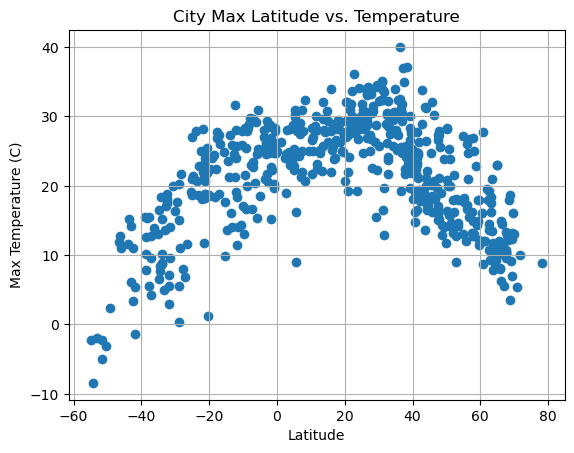

In [59]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Max Latitude vs. Temperature')
plt.grid()
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

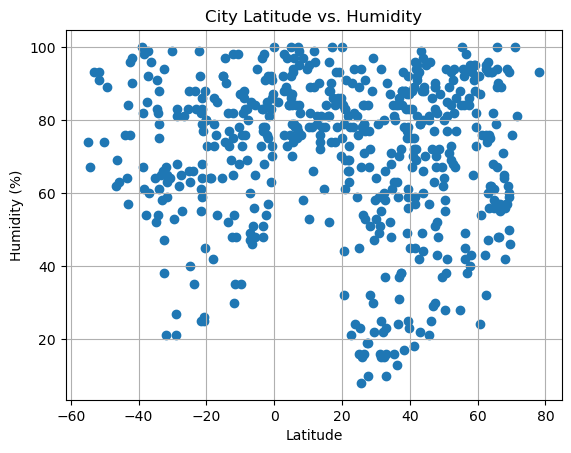

In [61]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')
plt.grid()
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

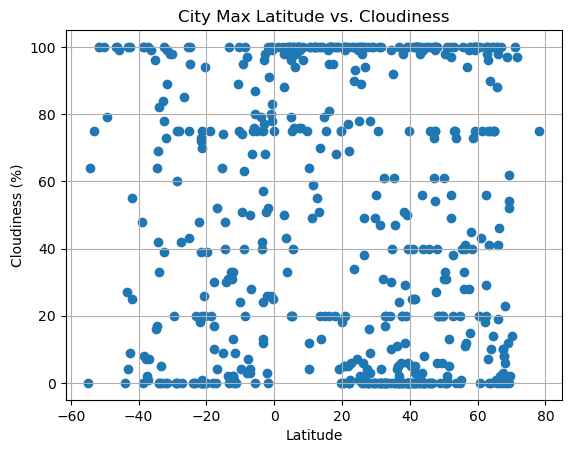

In [63]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Max Latitude vs. Cloudiness')
plt.grid()
# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

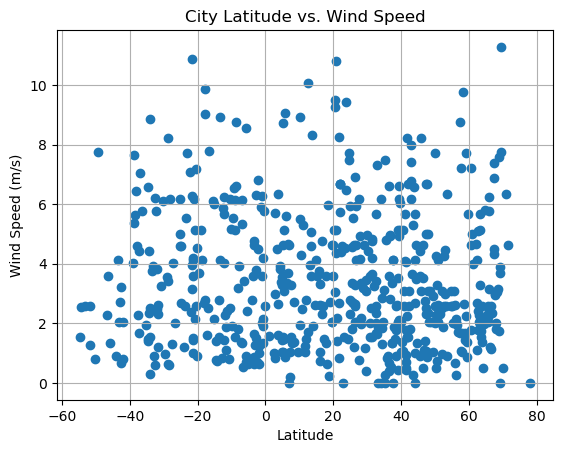

In [65]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values, y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed')
plt.grid()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [115]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

In [73]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,brookings,44.3114,-96.7984,17.27,89,8,3.48,US,1722998764
4,st. john's,47.5649,-52.7093,17.10,89,75,6.69,CA,1722998266
6,hadibu,12.6500,54.0333,25.11,81,55,10.06,YE,1722998368
7,devarkonda,16.7000,78.9333,23.86,90,100,4.76,IN,1722998768
9,iqaluit,63.7506,-68.5145,7.85,75,75,1.54,CA,1722998770


In [75]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port saint john's,-31.6229,29.5448,14.09,65,0,2.31,ZA,1722998760
1,grytviken,-54.2811,-36.5092,-8.43,67,64,2.56,GS,1722998761
2,afaahiti,-17.7500,-149.2833,26.93,86,17,9.03,PF,1722998763
5,edinburgh of the seven seas,-37.0676,-12.3116,9.61,60,7,7.04,SH,1722998766
8,luanda,-8.8368,13.2343,20.00,88,40,1.54,AO,1722998769


###  Temperature vs. Latitude Linear Regression Plot

r^2 value is: 0.43565332082240193


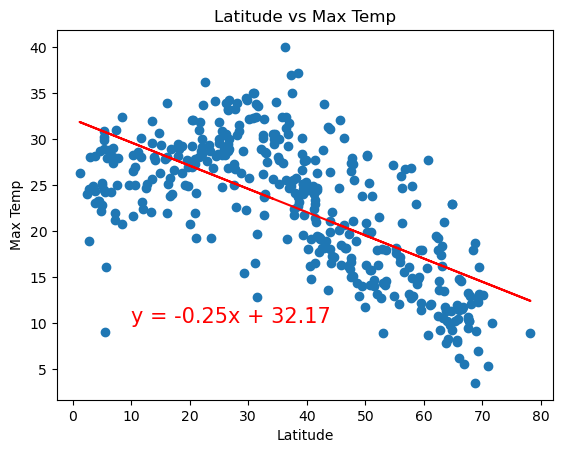

In [121]:
# Linear regression on Northern Hemisphere
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs Max Temp')
plt.annotate(line_eq, (10, 10), fontsize = 15, color = "red")
print(f"r^2 value is: {rvalue ** 2}")
plt.show()

r^2 value is: 0.5776715721241444


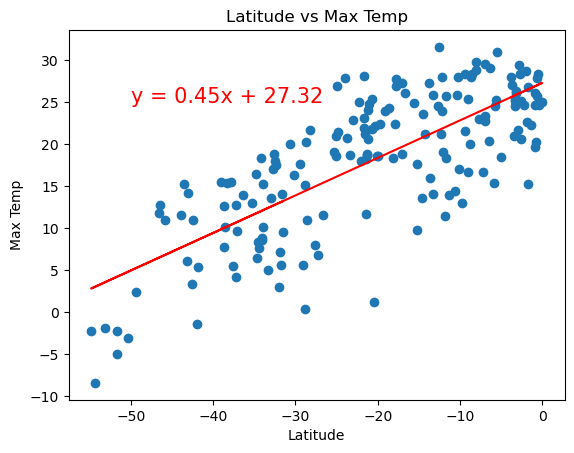

In [133]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs Max Temp')
plt.annotate(line_eq, (-50, 25), fontsize = 15, color = "red")
print(f"r^2 value is: {rvalue ** 2}")
plt.show()

**Discussion about the linear relationship:** The r^2 value is about 44% for northern and 58% for southern which doesn't for sure tell us that latitude is related to max temp.

### Humidity vs. Latitude Linear Regression Plot

r^2 value is: 0.013613233267046913


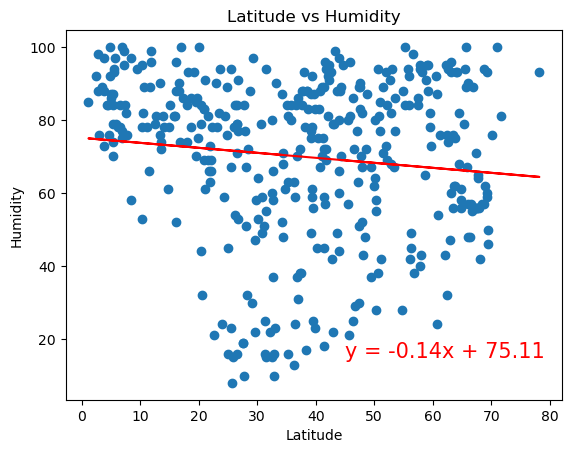

In [139]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity')
plt.annotate(line_eq, (45, 15), fontsize = 15, color = "red")
print(f"r^2 value is: {rvalue ** 2}")
plt.show()

r^2 value is: 1.562927363958306e-05


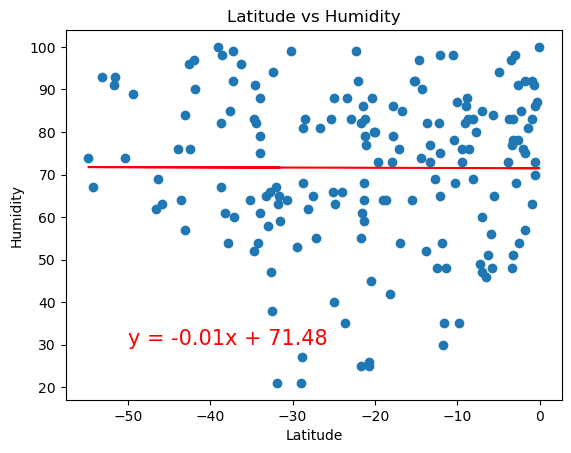

In [143]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity')
plt.annotate(line_eq, (-50, 30), fontsize = 15, color = "red")
print(f"r^2 value is: {rvalue ** 2}")
plt.show()

**Discussion about the linear relationship:** The r^2 values are extremely small which tell us that latitude and humidity are not correlated in both the northern and southern hemispheres according to our data.

### Cloudiness vs. Latitude Linear Regression Plot

r^2 value is: 0.0382608534967386


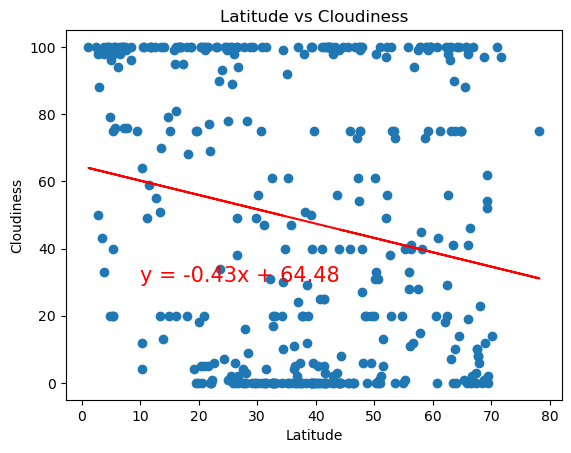

In [151]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloudiness')
plt.annotate(line_eq, (10, 30), fontsize = 15, color = "red")
print(f"r^2 value is: {rvalue ** 2}")
plt.show()

r^2 value is: 0.0010710385938843322


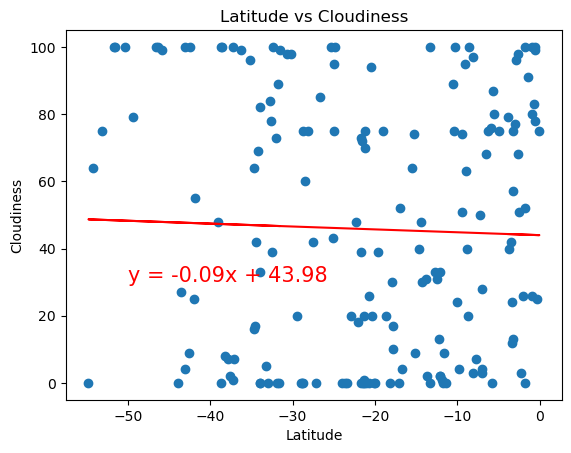

In [157]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs Cloudiness')
plt.annotate(line_eq, (-50, 30), fontsize = 15, color = "red")
print(f"r^2 value is: {rvalue ** 2}")
plt.show()

**Discussion about the linear relationship:** The r^2 values are extremely small which tell us that latitude and cloudiness are not correlated in both the northern and southern hemispheres according to our data.

### Wind Speed vs. Latitude Linear Regression Plot

r^2 value is: 0.0021408866268749546


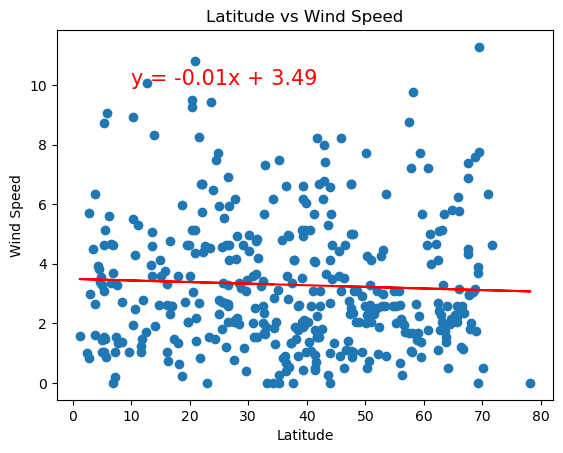

In [163]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs Wind Speed')
plt.annotate(line_eq, (10, 10), fontsize = 15, color = "red")
print(f"r^2 value is: {rvalue ** 2}")
plt.show()

r^2 value is: 0.0003260645419331135


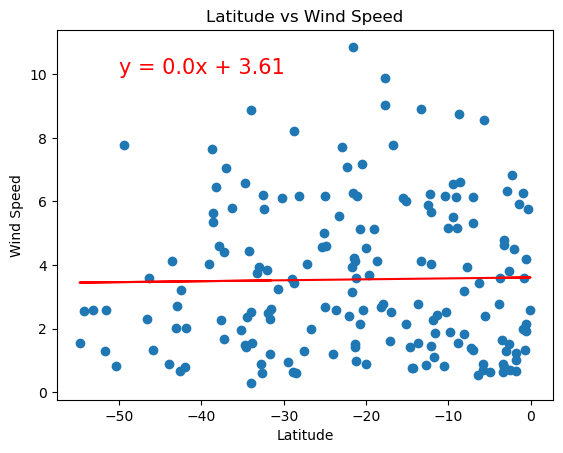

In [169]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs Wind Speed')
plt.annotate(line_eq, (-50, 10), fontsize = 15, color = "red")
print(f"r^2 value is: {rvalue ** 2}")
plt.show()

**Discussion about the linear relationship:** The r^2 values are extremely small which tell us that latitude and wind speed are not correlated in both the northern and southern hemispheres according to our data.